# Correlation and Regression Analysis of CO₂ Emissions in Vehicles

## 1. OBJECTIVES: 
Finding correlation between features and find the best regression model to predict CO2 emissions (target variable) of unobserved cars based on the selected features.

In [1]:
# Import Python libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## 2. DATASET AND METHOD
The used data is a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)
* You can download it here: "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv" (dataset included in the IBM Data Science Professional Certificate)


In [2]:
# read  into a pandas dataframe:
df_fuel=pd.read_csv("FuelConsumptionCo2.csv")
display(df_fuel.head())

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Each row consists of 13 features:
- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. **Z**(Gasoline), **E**(alternative-fuel vehicles), **X**(E85:85% ethanol + gasoline mix), **D**(Diesel)
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 


In [3]:
df_fuel.shape


(1067, 13)

In [4]:
## Check columns
print(df_fuel.columns)

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [5]:
# check missing values
print(df_fuel.isnull().sum()) 

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [6]:
print(df_fuel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

In [7]:
# 'MAKE', 'MODEL', 'VEHICLECLASS','TRANSMISSION', 'FUELTYPE', dtype='object' : categorical variables

In [8]:
# for numerical variables
df_fuel.describe().round(2)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00
mean,2014.0,3.35,5.79,13.30,9.47,11.58,26.44,256.23
std,0.0,1.42,1.80,4.10,2.79,3.49,7.47,63.37
min,2014.0,1.00,3.00,4.60,4.90,4.70,11.00,108.00
25%,2014.0,2.00,4.00,10.25,7.50,9.00,21.00,207.00
50%,2014.0,3.40,6.00,12.60,8.80,10.90,26.00,251.00
75%,2014.0,4.30,8.00,15.55,10.85,13.35,31.00,294.00
max,2014.0,8.40,12.00,30.20,20.50,25.80,60.00,488.00


## CO2 EMISSIONS by VEHICLECLASS

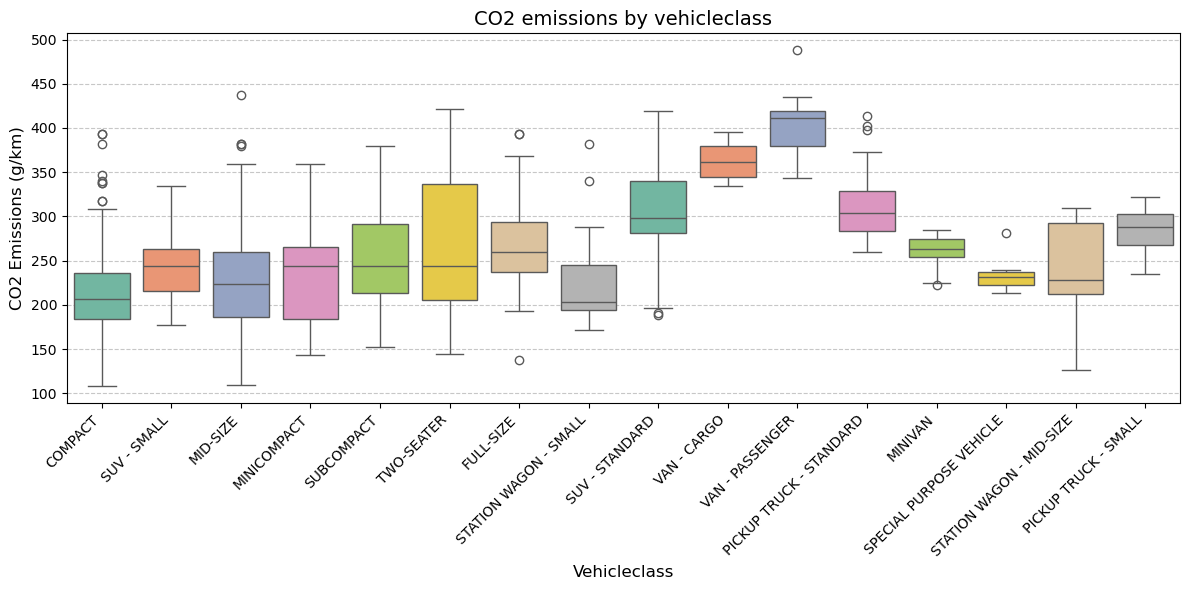

In [9]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="VEHICLECLASS", y="CO2EMISSIONS", data=df_fuel,  hue="VEHICLECLASS", palette="Set2", dodge=False)
plt.title("CO2 emissions by vehicleclass", fontsize=14)
plt.xlabel("Vehicleclass", fontsize=12)
plt.ylabel("CO2 Emissions (g/km)", fontsize=12)

plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()

* Van-Passenger has the highest CO2EMISSIONS compared with the other VEHICLECLASS.

## 3. CORRELATION

In [10]:
# Drop categoricals and any useless columns like MODELYEAR which is the same for all cars
df_fuel = df_fuel.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)
df_fuel.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
779,6.2,8,18.2,12.6,15.7,18,361
387,5.0,8,16.8,12.6,14.9,19,343
999,2.7,4,13.1,10.5,11.9,24,274
602,1.8,4,9.3,6.4,8.0,35,184
530,3.7,6,13.3,9.4,11.5,25,265


In [11]:
df_fuel.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


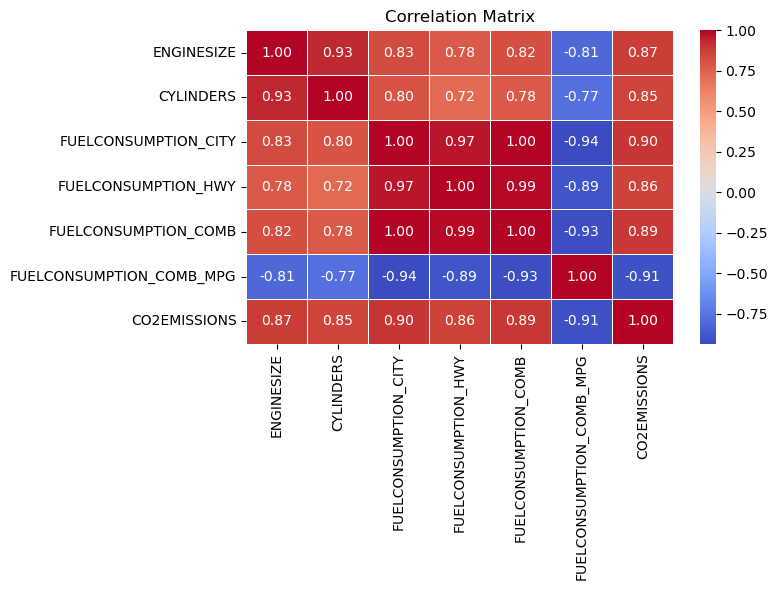

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df_fuel.corr(),
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

* The correlation matrix  shows that each variable presents a fairly high level of correlation with the target CO2EMISSIONS.

In [13]:
corr_results = []

for col in df_fuel.columns:
    if col != "CO2EMISSIONS":
        r, p = pearsonr(df_fuel[col], df_fuel["CO2EMISSIONS"])
        corr_results.append([col, r, p])

corr_df = pd.DataFrame(
    corr_results,
    columns=["Feature", "Pearson r", "p-value"]
).sort_values(by="Pearson r", key=abs, ascending=False)

pd.options.display.float_format = '{:.6f}'.format
corr_df


,Feature,Pearson r,p-value
5,FUELCONSUMPTION_COMB_MPG,-0.906394,0.000000
2,FUELCONSUMPTION_CITY,0.898039,0.000000
4,FUELCONSUMPTION_COMB,0.892129,0.000000
0,ENGINESIZE,0.874154,0.000000
3,FUELCONSUMPTION_HWY,0.861748,0.000000
1,CYLINDERS,0.849685,0.000000


Although strong correlations are observed, correlation alone does not imply causation. 

## Linear Regression
### CO2 EMISSIONS vs ENGINESIZE

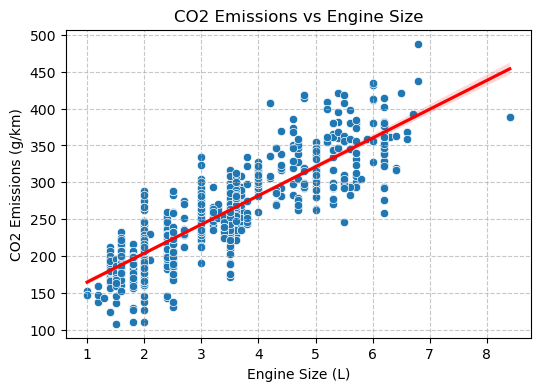

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df_fuel)
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df_fuel, scatter=False, color='red')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("CO2 Emissions vs Engine Size")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [15]:
slope,intercept,r_value,p_value,std_err=linregress(df_fuel['ENGINESIZE'], df_fuel['CO2EMISSIONS'])
print("=== Hypothesis test ===")
print(f"Slope coefficient (b):{slope:.4f} g/km")
print(f"Intercept (a):{intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"p-value:{p_value:.4f}")

=== Hypothesis test ===
Slope coefficient (b):39.1252 g/km
Intercept (a):125.3041
Correlation coefficient (r): 0.8742
p-value:0.0000


In [16]:
##  Inferential decision
alpha=0.05
if p_value < alpha:
    print("\n Result: Reject H0 -> the relationship is statistically significant.")
else: 
    print("\n Result: We fail to reject the null hypothesis (H0) -> no statistically significant relationship is observed.")


 Result: Reject H0 -> the relationship is statistically significant.


* The hypothesis test confirms a strong and statistically significant correlation between ENGINESIZE and CO2EMISSIONS. The linear regression shows a positive and statistically significant relationship between the two variables (b = 39.12 g/km, r = 0.87, p < 0.001), indicating that the observed association is not attributable to chance.

### Predict CO2 Emissions from Engine Size

In [17]:
# Select only the most relevant feature
X = df_fuel[['ENGINESIZE']]  # 2D array for sklearn
y = df_fuel['CO2EMISSIONS']  # target

In [18]:
# Split into train and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Create linear regression model
lin_reg_simple = linear_model.LinearRegression()
lin_reg_simple .fit(X_train, y_train)


LinearRegression()

In [20]:
# Coefficients
print("Coefficient:", lin_reg_simple .coef_[0])
print("Intercept:", lin_reg_simple .intercept_)

Coefficient: 38.992978724434046
Intercept: 126.2897021740873


In [21]:
# Predict on test set
y_pred = lin_reg_simple .predict(X_test)

In [22]:
# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² score: {r2:.3f}")

Mean Squared Error (MSE): 985.94
R² score: 0.762


* The model achieves an R² of 0.762, meaning that ENGINESIZE alone accounts for about 76% of the variability in  CO2EMISSIONS. The MSE of 985.94 indicates non-negligible prediction errors. These results suggest that while ENGINESIZE is a strong predictor, additional variables are likely needed to improve predictive accuracy.

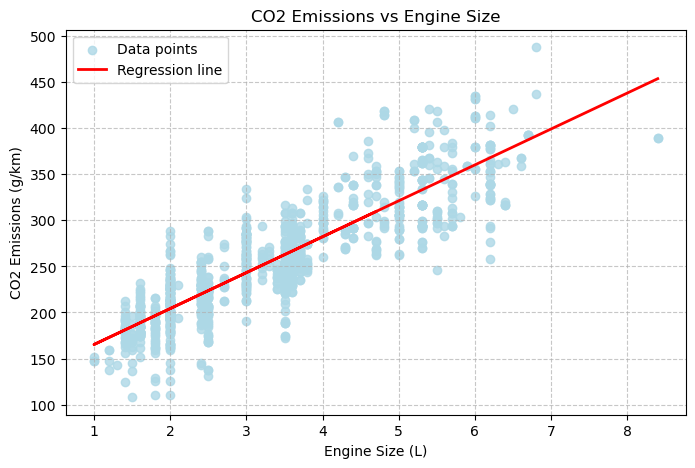

In [23]:
# Plot regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='lightblue', alpha=0.8, label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title("CO2 Emissions vs Engine Size")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

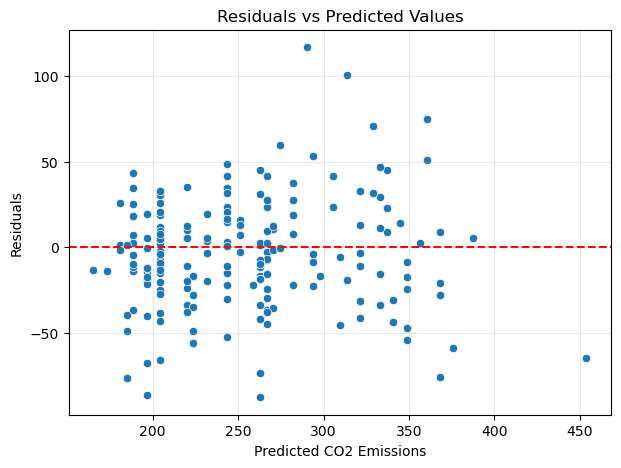

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(alpha=0.3)
plt.show()

* The residuals are generally distributed around zero, meaning that the model captures the linear relationship reasonably well. However, some residuals show relatively large deviations locally, suggesting the presence of non-negligible prediction errors. This is consistent with the previous results.

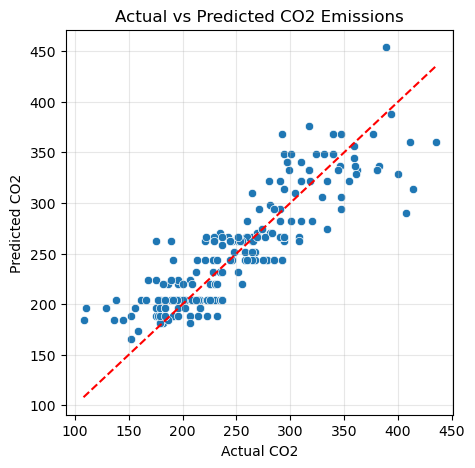

In [25]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual CO2")
plt.ylabel("Predicted CO2")
plt.title("Actual vs Predicted CO2 Emissions")
plt.grid(alpha=0.3)
plt.show()


* The Actual vs Predicted values are largely concentrated around the line, indicating a good overall fit. However, for higher CO2EMISSIONS levels, some points deviates from the line, suggesting that the model tends to be less accurate for vehicles with high emissions. 

## Multiple linear regression

Although VIF (Variance Inflation Factor) was not explicitly calculated, correlation analysis suggests that, to reduce multicollinearity, highly correlated predictors should be removed based on Pearson correlation.
* 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so 'CYLINDERS' can be dropped.

* Each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with CO2EMISSIONS, the others can be dropped: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

In [26]:
df_fuel = df_fuel.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)
df_fuel.head(5)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.000000,33,196
1,2.400000,29,221
2,1.500000,48,136
3,3.500000,25,255
4,3.500000,27,244


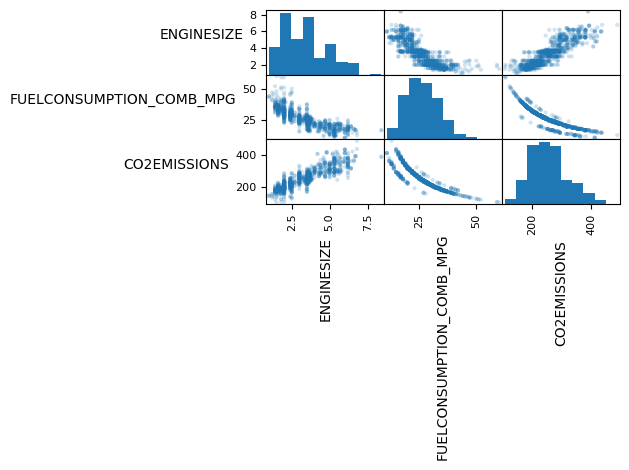

In [27]:
# Creation of a scatter matrix, which shows the scatter plots for each pair of input features. The diagonal of the matrix shows 
# each feature's histogram.
axes = pd.plotting.scatter_matrix(df_fuel, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [28]:
# Extract the required columns and convert the resulting dataframes to NumPy arrays.
X = df_fuel.iloc[:,[0,1]].to_numpy()
y = df_fuel.iloc[:,[2]].to_numpy()

In [29]:
# standardize the input features to ensure comparability of coefficients and numerical stability 
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [30]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.000000,1067.000000
mean,0.000000,-0.000000
std,1.000000,1.000000
min,-1.660000,-2.070000
25%,-0.950000,-0.730000
50%,0.040000,-0.060000
75%,0.670000,0.610000
max,3.570000,4.500000


In [31]:
# Randomly split the data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [32]:
# create a model object
lin_reg_multiple  = linear_model.LinearRegression()

# train the model in the training data
lin_reg_multiple.fit(X_train, y_train)

# Print the coefficients
coef_ =  lin_reg_multiple.coef_
intercept_ = lin_reg_multiple.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [33]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


In [34]:
y_train_pred = lin_reg_multiple.predict(X_train)
y_test_pred = lin_reg_multiple.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² train: {r2_train:.3f}")
print(f"R² test : {r2_test:.3f}")

R² train: 0.877
R² test : 0.887


* The model explains approximately 88% of the variance in CO2EMISSIONS on both training and test data. The consistency between train and test R² values indicates a stable model with good generalization capability and limited overfitting. Compared to the simple linear regression using only ENGINESIZE, the multiple linear regression model significantly improves predictive performance. The test R² increases from 0.762 to 0.887, indicating that including additional relevant predictors captures more of the variability in CO2EMISSIONS.

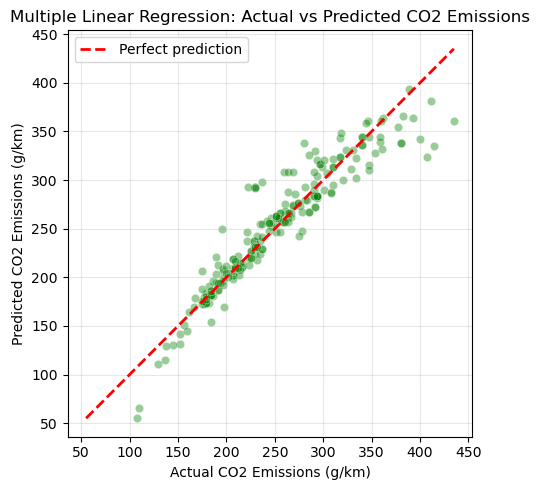

In [35]:
plt.figure(figsize=(5,5))

sns.scatterplot(
    x=y_test.flatten(),
    y=y_test_pred.flatten(),
    alpha=0.4,
    color="green"
)

# Linea og perfect prediction
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())

plt.plot([min_val, max_val],
         [min_val, max_val],
         'r--',
         linewidth=2,
         label='Perfect prediction')

plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Multiple Linear Regression: Actual vs Predicted CO2 Emissions")

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The Actual vs Predicted scatter plot shows a higher density of observations close to the 45-degree reference line, indicating strong agreement between predicted and observed CO2EMISSIONS. Minor deviations are observed at higher emission levels compared to the linear regression.

### CO2EMISSIONS vs FUELCONSUMPTION_COMB_MPG

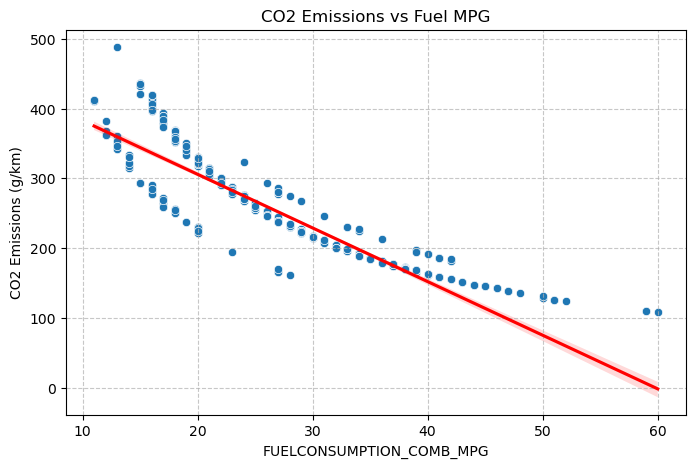

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df_fuel)
sns.regplot(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df_fuel, scatter=False, color='red')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("CO2 Emissions vs Fuel MPG")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [37]:
slope,intercept,r_value,p_value,std_err=linregress(df_fuel['FUELCONSUMPTION_COMB_MPG'], df_fuel['CO2EMISSIONS'])
print("=== Hypothesis test ===")
print(f"Slope coefficient (b):{slope:.4f} g/km")
print(f"Intercept (a):{intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"p-value:{p_value:.4f}")

=== Hypothesis test ===
Slope coefficient (b):-7.6908 g/km
Intercept (a):459.5844
Correlation coefficient (r): -0.9064
p-value:0.0000


In [38]:
##  Inferential decision
alpha=0.05
if p_value < alpha:
    print("\n Result: Reject H0 -> the relationship is statistically significant.")
else: 
    print("\n Result: We fail to reject the null hypothesis (H0) -> no statistically significant relationship is observed.")


 Result: Reject H0 -> the relationship is statistically significant.


* The hypothesis test reveals a strong and statistically significant negative association between combined FUELCONSUMPTION_COMB_MPG and CO2EMISSIONS. The estimated slope indicates that an increase of one MPG is associated, on average, with a reduction of approximately 7.7 g/km of CO2EMISSIONS. The strong negative association suggests a statistically significant relationship

### Polynomial regression 

The correlation matrix shows that the relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear. 

In [39]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_fuel[["FUELCONSUMPTION_COMB_MPG"]])

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

lin_reg_poly = linear_model.LinearRegression()
lin_reg_poly.fit(X_train, y_train)

y_pred_poly = lin_reg_poly.predict(X_test)

print("R² (Polynomial):", r2_score(y_test, y_pred_poly))


R² (Polynomial): 0.8654462942417687


C:\Users\UTENTE\anaconda3\envs\py310copygeopandas\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


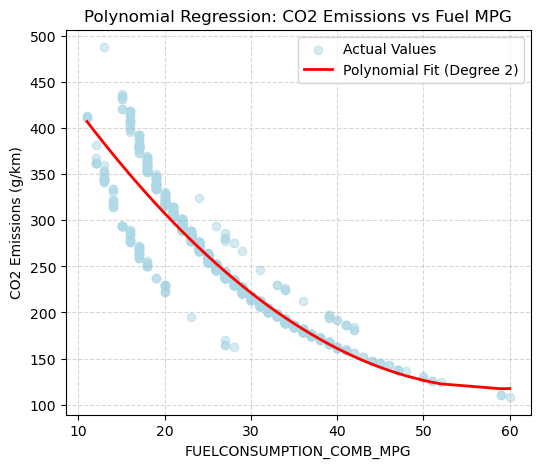

In [40]:
# Scatterplot of actual vs predicted CO2 emissions
plt.figure(figsize=(6,5))

# Scatter of actual points
plt.scatter(df_fuel['FUELCONSUMPTION_COMB_MPG'], df_fuel['CO2EMISSIONS'], color='lightblue', alpha=0.5, label='Actual Values')

# Sort data for a smooth line
X_sorted = np.sort(df_fuel['FUELCONSUMPTION_COMB_MPG']).reshape(-1,1)
y_poly_sorted = lin_reg_poly.predict(poly.transform(X_sorted))

# Plot predicted polynomial line
plt.plot(X_sorted, y_poly_sorted, color='red', linewidth=2, label='Polynomial Fit (Degree 2)')

plt.title("Polynomial Regression: CO2 Emissions vs Fuel MPG")
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Polynomial regression (degree 2) captures non-linear effects between FUELCONSUMPTION_COMB_MPG and CO2EMISSIONS. 

## CONCLUSIONS:
- ENGINESIZE is strongly positively correlated with CO2EMISSIONS.
- FUELCONSUMPTION_COMB_MPG presents a strong negative non-linear relationship with CO2EMISSIONS; higher FUELCONSUMPTION_COMB_MPG reduces emissions.
- Simple linear regression (ENGINESIZE) explains ~76% of variability; multiple regression (ENGINESIZE + FUELCONSUMPTION_COMB_MPG) improves R² to ~88%, showing better predictive power.
- Polynomial regression captures non-linear effects between FUELCONSUMPTION_COMB_MPG and CO2EMISSIONS, improving fit for extreme values.
